# Self-Driving Car Engineer Nanodegree

## Data_Augmentation



---
## Load the Packages

In [1]:
import pickle
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import csv
import cv2 
import tensorflow as tf
import skimage

---
## Step 0: Load The Data

In [2]:
# Load pickled data
# TODO: Fill this in based on where you saved the training and testing data
            
training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of validation examples
n_validation = y_valid.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [12]:
def csv_dict_list(variables_file):
    with open(variables_file, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        dict_list = []
        for row in reader:
            dict_list.append([row['ClassId'], row['SignName']])
    return dict_list

signnames = csv_dict_list('signnames.csv')
list(signnames)[0]

['0', 'Speed limit (20km/h)']

In [5]:
signnames;

10
['10', 'No passing for vehicles over 3.5 metric tons']


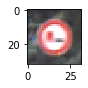

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])
print(list(signnames)[y_train[index]])

28
['28', 'Children crossing']


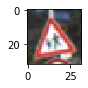

In [6]:
index = random.randint(0, len(X_valid))
image = X_valid[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_valid[index])
print(list(signnames)[y_valid[index]])

### Pre-process the Data Set (normalization, grayscale, etc.)

### Data Augmentation
Creating Patterns using Translation, Rotation, and Reflection. Goal is to boost the numbers of images in all categories to 2120 (= maximum of frequency) 
I found 6 methods in the following link
https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/

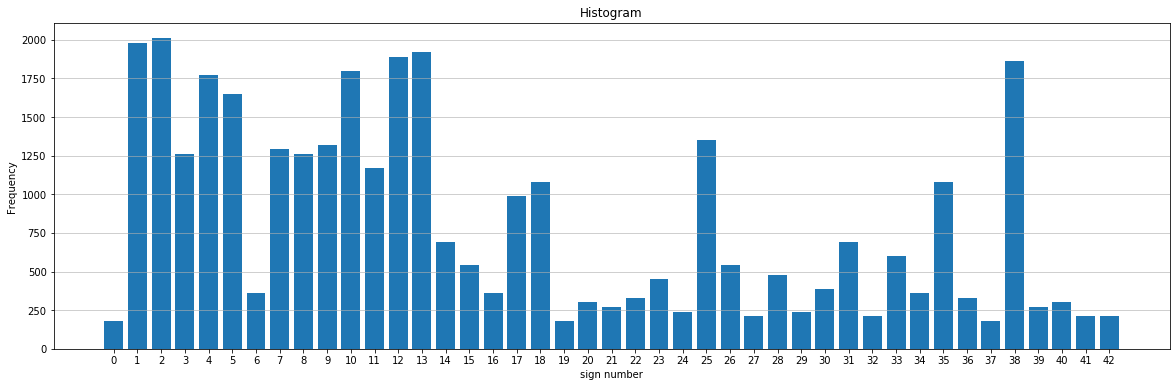

In [10]:
f = plt.figure(figsize=(20,6))
unique, counts = np.unique(y_train, return_counts=True)
classes_dict = dict(zip(unique, counts))
plt.bar(range(len(classes_dict)), classes_dict.values(), align='center')
plt.plot(figsize=(24,6))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('sign number')
plt.ylabel('Frequency')
plt.title('Histogram')
maxfreq = counts.max()
plt.xticks(range(43),range(43))
#plt.savefig('visualizations/unprocessed_distributions.png')

In [53]:
print(classes_dict)

{0: 180, 1: 1980, 2: 2010, 3: 1260, 4: 1770, 5: 1650, 6: 360, 7: 1290, 8: 1260, 9: 1320, 10: 1800, 11: 1170, 12: 1890, 13: 1920, 14: 690, 15: 540, 16: 360, 17: 990, 18: 1080, 19: 180, 20: 300, 21: 270, 22: 330, 23: 450, 24: 240, 25: 1350, 26: 540, 27: 210, 28: 480, 29: 240, 30: 390, 31: 690, 32: 210, 33: 599, 34: 360, 35: 1080, 36: 330, 37: 180, 38: 1860, 39: 270, 40: 300, 41: 210, 42: 210}


In [52]:
def dictfind(din, tsent, fsent):
    for k in sorted(din.iterkeys()):
        if din[k] == tsent:
            return True
        if din[k] == fsent:
            return False
        else:
            raise ValueError('No match found')

D = {0:'a', 1:'b', 2:'c', 3:'d', 4:'e'}

print(dictfind(D, 'b', 'd'))

AttributeError: 'dict' object has no attribute 'iterkeys'

In [27]:
print([counts.max(), counts.min()]

[2010, 180]


In [63]:
classes_dict.get(0)

180

In [81]:
len(y_train)

34799

In [96]:
re=[]
for i in y_train:
    if i not in re:
        re = np.append(re, i)
    else: 
        pass
index=[0]
for i in re:
    index = np.append(index, index[-1] + classes_dict.get(i))

print(index)

[    0   210   900  1230  1770  2220  4200  4500  4830  5010  5370  6630
  6810  8580  9750  9960 10140 10350 10560 10800 11040 12360 14010 15870
 17130 18930 20010 20370 21450 21810 23730 25020 25410 25680 25950 26250
 26849 27329 29219 29909 30449 31439 33449 34799]


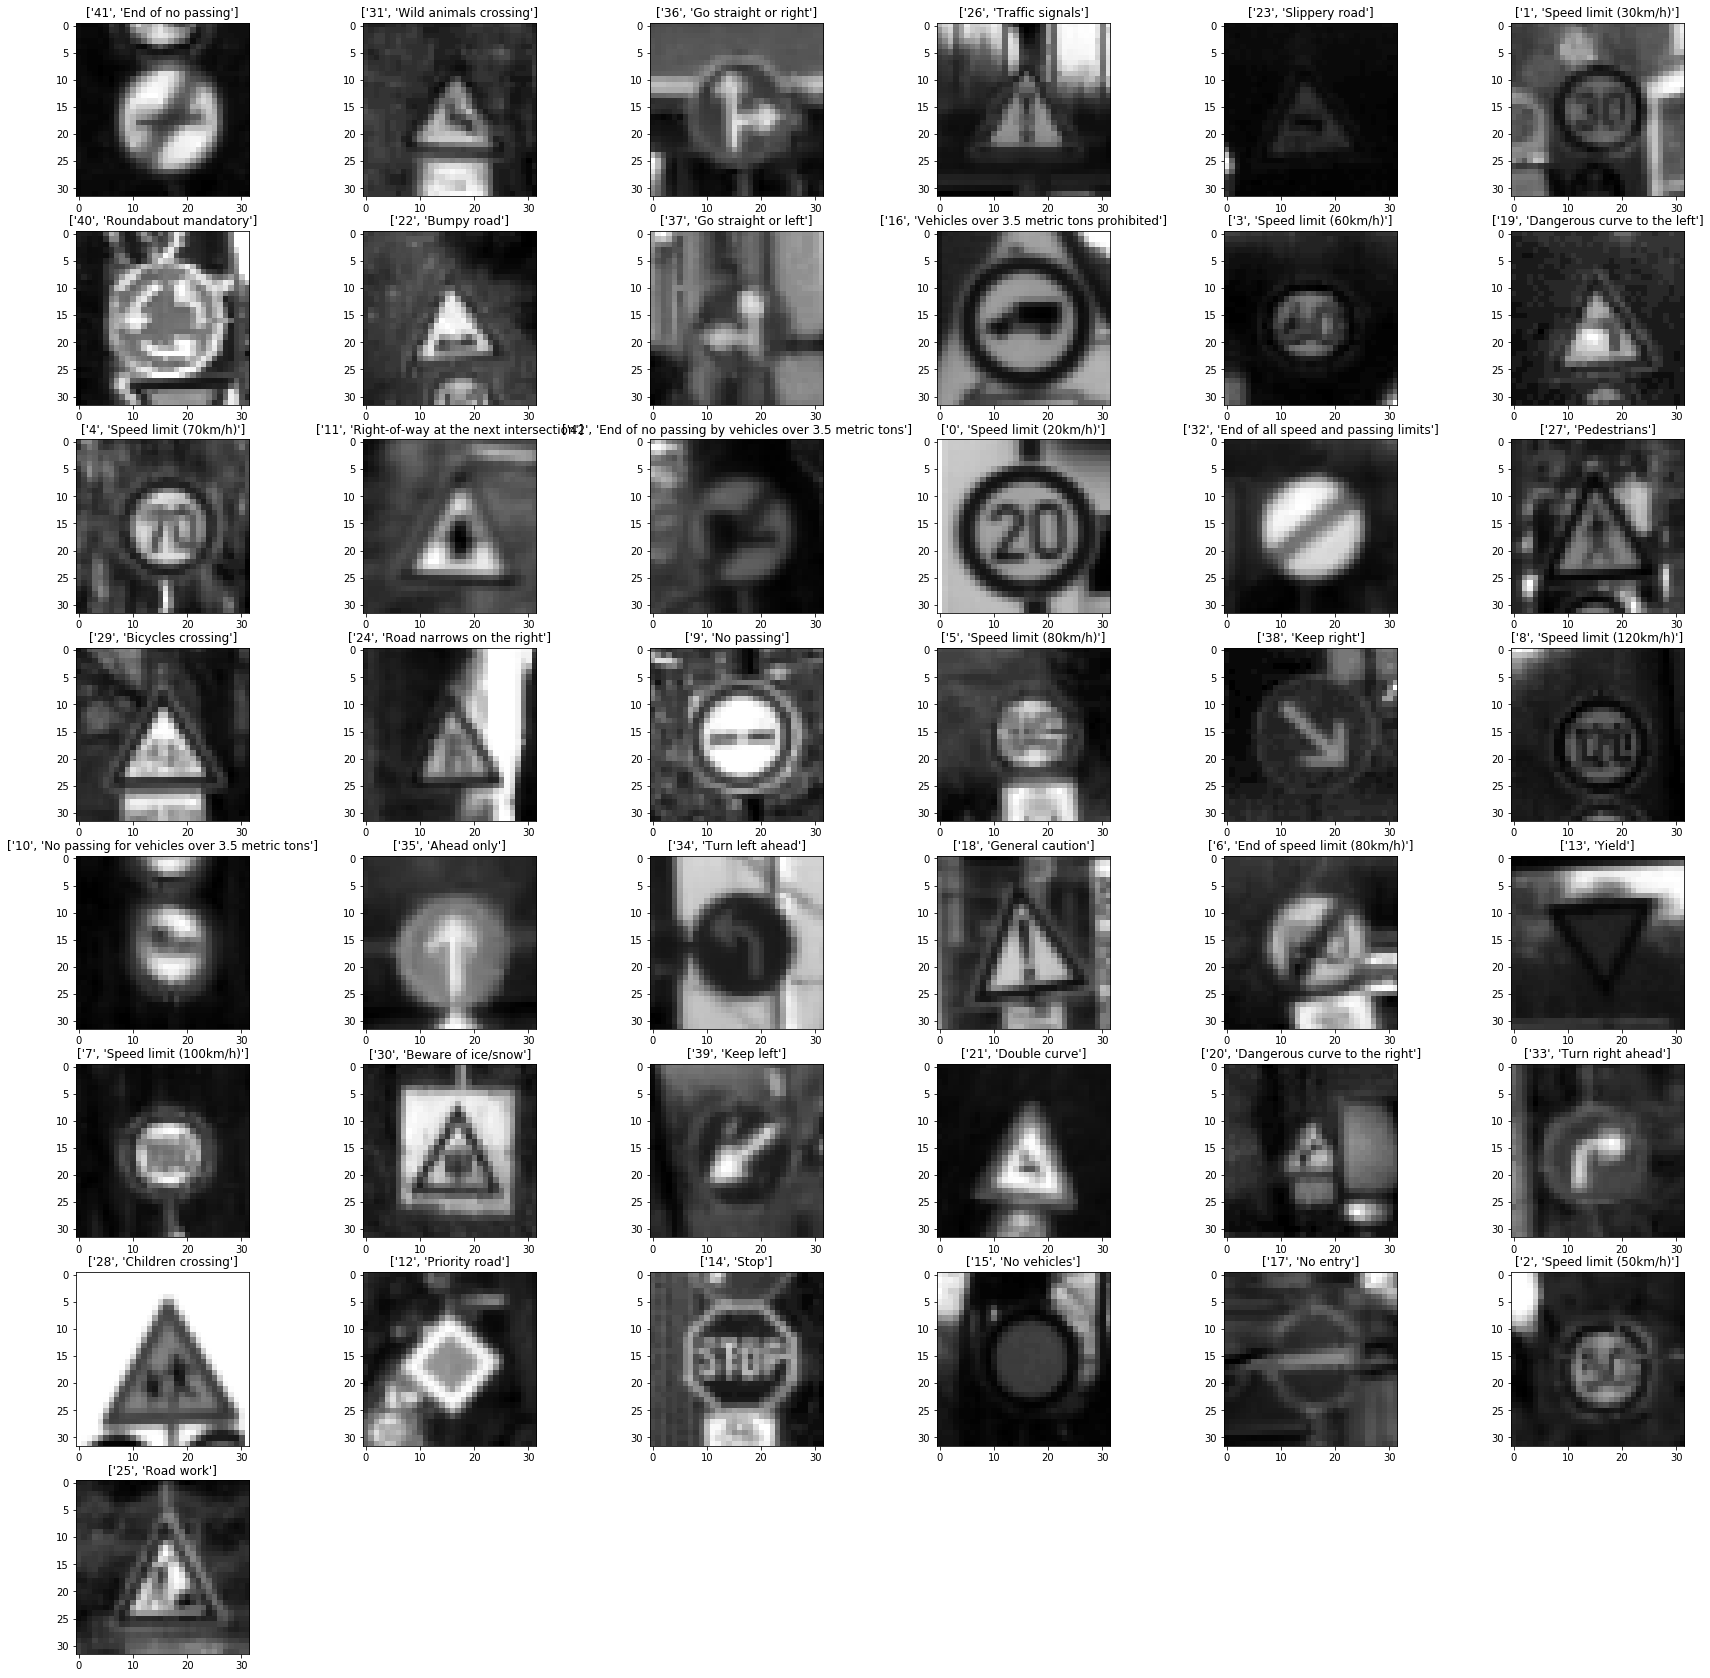

In [119]:
def show_with_matplotlib(img, title, pos):
    """Shows an image using matplotlib capabilities"""
    ax = plt.subplot(8, 6, pos)
    plt.imshow(img, cmap = 'gray')
    plt.title(title) 

plt.figure(figsize=(30,30))
for i in range(43):
    idx = index[i] 
    #final = np.empty((32,32,3))
    image = X_train[idx]
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    final= (gray-128)/128*255
    #final[:,:,0] = gray
    show_with_matplotlib(gray, list(signnames)[y_train[idx]], i+1)

### 1. Flip


['15', 'No vehicles']


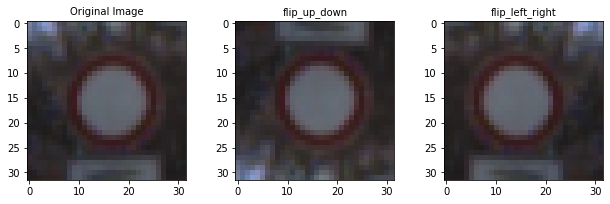

In [13]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
shape = [32, 32, 3]
x = tf.placeholder("uint8", shape = shape)
flip_1 = tf.image.flip_up_down(x)
flip_2 = tf.image.flip_left_right(x)

with tf.Session() as session:
    result_1 = session.run(flip_1, feed_dict={x: image})  
    result_2 = session.run(flip_2, feed_dict={x: image})  
    
f, ax1 = plt.subplots(1, 3, figsize=(8, 3))
f.tight_layout() 
ax1[0].imshow(image)
ax1[0].set_title('Original Image', fontsize=10)
ax1[1].imshow(result_1, cmap = 'gray')
ax1[1].set_title('flip_up_down', fontsize=10)
ax1[2].imshow(result_2, cmap = 'gray')
ax1[2].set_title('flip_left_right', fontsize=10)
plt.subplots_adjust(left = 0., right=1, top=0.9, bottom=0.)
print(list(signnames)[y_train[index]])

### 2. Rotation

['17', 'No entry']


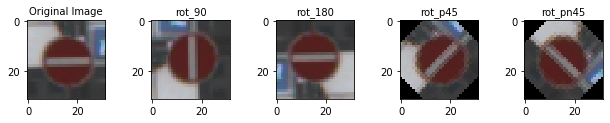

In [187]:
# Placeholders: 'x' = A single image, 'y' = A batch of images
# 'k' denotes the number of 90 degree anticlockwise rotations

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
shape = [32, 32, 3]
x = tf.placeholder(dtype = tf.float32, shape = shape)
rot_90 = tf.image.rot90(x, k=1)
rot_180 = tf.image.rot90(x, k=2)
# To rotate in any angle. In the example below, 'angles' is in radians
y = tf.placeholder(dtype = tf.float32, shape = shape)
rot_p45 = tf.contrib.image.rotate(y, angles=3.1415/4)
rot_n45 = tf.contrib.image.rotate(y, angles=-3.1415/4)

# Scikit-Image. 'angle' = Degrees. 'img' = Input Image
# For details about 'mode', checkout the interpolation section below.
#rot = skimage.transform.rotate(imgae, angle=45, mode='reflect')

with tf.Session() as session:
    result_1 = session.run(rot_90, feed_dict={x: image}) 
    result_2 = session.run(rot_180, feed_dict={x: image})
    result_3 = session.run(rot_p45, feed_dict={y: image})
    result_4 = session.run(rot_n45, feed_dict={y: image})

f, ax1 = plt.subplots(1, 5, figsize=(8, 3))
f.tight_layout() 
ax1[0].imshow(image)
ax1[0].set_title('Original Image', fontsize=10)
ax1[1].imshow(result_1.astype(np.uint8))
ax1[1].set_title('rot_90', fontsize=10)
ax1[2].imshow(result_2.astype(np.uint8))
ax1[2].set_title('rot_180', fontsize=10)
ax1[3].imshow(result_3.astype(np.uint8))
ax1[3].set_title('rot_p45', fontsize=10)
ax1[4].imshow(result_4.astype(np.uint8))
ax1[4].set_title('rot_pn45', fontsize=10)
plt.subplots_adjust(left = 0., right=1, top=0.9, bottom=0.)
print(list(signnames)[y_train[index]])

### 3. Scale and 4. Crop 

Text(0.5, 1, 'scale_in')

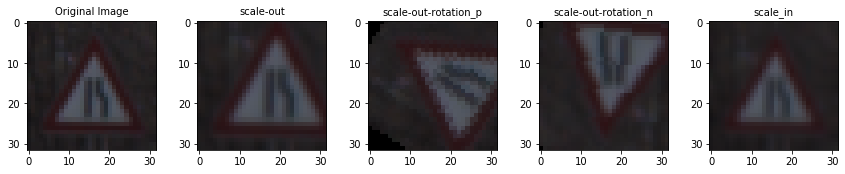

In [225]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
# Scikit Image. 'img' = Input Image, 'scale' = Scale factor
# For details about 'mode', checkout the interpolation section below.
scale_out_img = skimage.transform.rescale(image, scale=1.25, mode='constant')
scale_in_img = skimage.transform.rescale(image, scale=0.75, mode='constant')
# Don't forget to crop the images back to the original size (for 
# scale_out)

original_size_1 = [32*1.25, 32*1.25, 3]
original_size_2 = [32*0.75, 32*0.75, 3]
x = tf.placeholder(dtype = tf.float32, shape = original_size_1)
y = tf.placeholder(dtype = tf.float32, shape = original_size_2)

# Use the following commands to perform random crops
crop_size = [32, 32, 3]
seed = np.random.randint(5)
rotation_p =  3.1415*np.random.random_sample()
rotation_n = -3.1415*np.random.random_sample()
rot_randomp = tf.contrib.image.rotate(x, angles=rotation_p)
rot_randomn = tf.contrib.image.rotate(x, angles=-rotation_n)

scale_out_0 = tf.random_crop(x, size = crop_size, seed = seed)
scale_out_1 = tf.random_crop(rot_randomp, size = crop_size, seed = seed)
scale_out_2 = tf.random_crop(rot_randomn, size = crop_size, seed = seed)
scale_in = tf.image.resize_images(y, size = [32, 32])

with tf.Session() as session:
    result_1 = session.run(scale_out_0, feed_dict={x: scale_out_img})*255 
    result_2 = session.run(scale_out_1, feed_dict={x: scale_out_img})*255
    result_3 = session.run(scale_out_2, feed_dict={x: scale_out_img})*255
    result_4 = session.run(scale_in, feed_dict={y: scale_in_img})*255

f, ax1 = plt.subplots(1, 5, figsize=(12, 3))
f.tight_layout() 
ax1[0].imshow(image)
ax1[0].set_title('Original Image', fontsize=10)
ax1[1].imshow(result_1.astype(np.uint8))
ax1[1].set_title('scale-out', fontsize=10)
ax1[2].imshow(result_2.astype(np.uint8))
ax1[2].set_title('scale-out-rotation_p', fontsize=10)
ax1[3].imshow(result_3.astype(np.uint8))
ax1[3].set_title('scale-out-rotation_n', fontsize=10)
ax1[4].imshow(result_4.astype(np.uint8))
ax1[4].set_title('scale_in', fontsize=10)

### 4. Crop

### 5. Translation

In [172]:
# pad_left, pad_right, pad_top, pad_bottom denote the pixel 
# displacement. Set one of them to the desired value and rest to 0
#shape = [batch, height, width, channels]
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

offset_height=1
offset_width=1
height=32
width=32
shape = [height + offset_height, width + offset_width, 3]
x = tf.placeholder(dtype = tf.float32, shape = shape)
# We use two functions to get our desired augmentation

x = tf.image.pad_to_bounding_box(x, offset_height, offset_width, height + offset_height, width + offset_width)
output = tf.image.crop_to_bounding_box(x, offset_height, offset_width, height + offset_height, width + offset_width)

with tf.Session() as session:
    result = session.run(output, feed_dict={x: image}) 

f, ax1 = plt.subplots(1, 2, figsize=(8, 3))
f.tight_layout() 
ax1[0].imshow(image)
ax1[0].set_title('Original Image', fontsize=10)
ax1[1].imshow(result.astype(np.uint8))
ax1[1].set_title('flip_up_down', fontsize=10)   

ValueError: width must be <= target - offset

### 6. Gaussian Noise

Text(0.5, 1, 'flip_up_down')

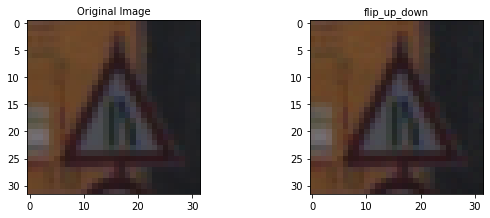

In [173]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

#TensorFlow. 'x' = A placeholder for an image.
shape = [32, 32, 3]
x = tf.placeholder(dtype = tf.float32, shape = shape)
# Adding Gaussian noise
noise = tf.random_normal(shape = tf.shape(x), mean=0.0, stddev=1, dtype=tf.float32)
output = tf.add(x, noise)
# Use the following commands to perform random crops

with tf.Session() as session:
    result = session.run(output, feed_dict={x: image}) 
    
f, ax1 = plt.subplots(1, 2, figsize=(8, 3))
f.tight_layout() 
ax1[0].imshow(image)
ax1[0].set_title('Original Image', fontsize=10)
ax1[1].imshow(result.astype(np.uint8))
ax1[1].set_title('flip_up_down', fontsize=10)

### Final Augmention

In [ ]:
def data_augmentation(image):
    shape = [32, 32, 3]
    original_size_1 = [32*1.25, 32*1.25, 3]
    original_size_2 = [32*0.75, 32*0.75, 3]
    x = tf.placeholder(dtype = tf.float32, shape = shape)
    x_plus = tf.placeholder(dtype = tf.float32, shape = original_size_1)
    x_mius= tf.placeholder(dtype = tf.float32, shape = original_size_2)
    flip_1 = tf.image.flip_up_down(x)
    flip_2 = tf.image.flip_left_right(x)
    rot_90 = tf.image.rot90(x, k=1)
    rot_180 = tf.image.rot90(x, k=2)
    scale_out_img = skimage.transform.rescale(image, scale=1.25, mode='constant')
    scale_in_img = skimage.transform.rescale(image, scale=0.75, mode='constant')
    crop_size = [32, 32, 3]
    seed = np.random.randint(5)
    rotation_p =  3.1415*np.random.random_sample()
    rotation_n = -3.1415*np.random.random_sample()
    rot_randomp = tf.contrib.image.rotate(x, angles=rotation_p)
    rot_randomn = tf.contrib.image.rotate(x, angles=-rotation_n)
    scale_out_0 = tf.random_crop(x, size = crop_size, seed = seed)
    scale_out_1 = tf.random_crop(rot_randomp, size = crop_size, seed = seed)
    scale_out_2 = tf.random_crop(rot_randomn, size = crop_size, seed = seed)
    scale_in = tf.image.resize_images(y, size = [32, 32])

### After all data augmentation, here we are

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
for idx in range(len(X_train)):
    image = X_train[index].squeeze()
    image[:,:,4] = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    img2=(gray-np.mean(gray))/np.std(gray)


In [9]:
gray.shape

(32, 32)